In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

train_data_path = '/content/drive/My Drive/DSW_ML_Assignment-Dec24/train_data.xlsx'
test_data_path = '/content/drive/My Drive/DSW_ML_Assignment-Dec24/test_data.xlsx'

In [4]:
train_data = pd.read_excel(train_data_path)
test_data = pd.read_excel(test_data_path)


This code displays the first 5 rows of the training dataset to give an overview of its structure. It helps in understanding the format and values of the data before further processing.


In [5]:

print("\nTrain Data (Top 5 Rows):\n", train_data.head())


Train Data (Top 5 Rows):
    customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  

In [6]:

print("\nMissing Values in Train Data:\n", train_data.isnull().sum())
print("\nMissing Values in Test Data:\n", test_data.isnull().sum())


Missing Values in Train Data:
 customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64

Missing Values in Test Data:
 customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


This code creates a scatter plot to visualize the relationship between annual income and loan amount, with points colored by home ownership status. It helps to identify patterns and trends in the data.


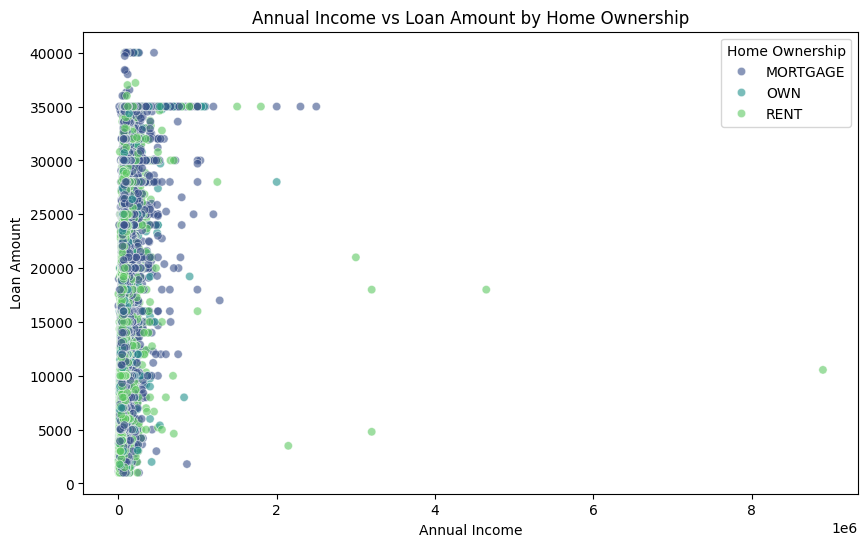

In [8]:
# Annual Income vs Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='home_ownership', data=train_data, palette='viridis', alpha=0.6)
plt.title('Annual Income vs Loan Amount by Home Ownership')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Home Ownership')
plt.show()

This code plots the proportion of loan statuses (e.g., approved, declined) for each loan purpose. It helps to compare how loan outcomes vary across different loan purposes by visualizing the percentages in a stacked bar chart.


<Figure size 1200x600 with 0 Axes>

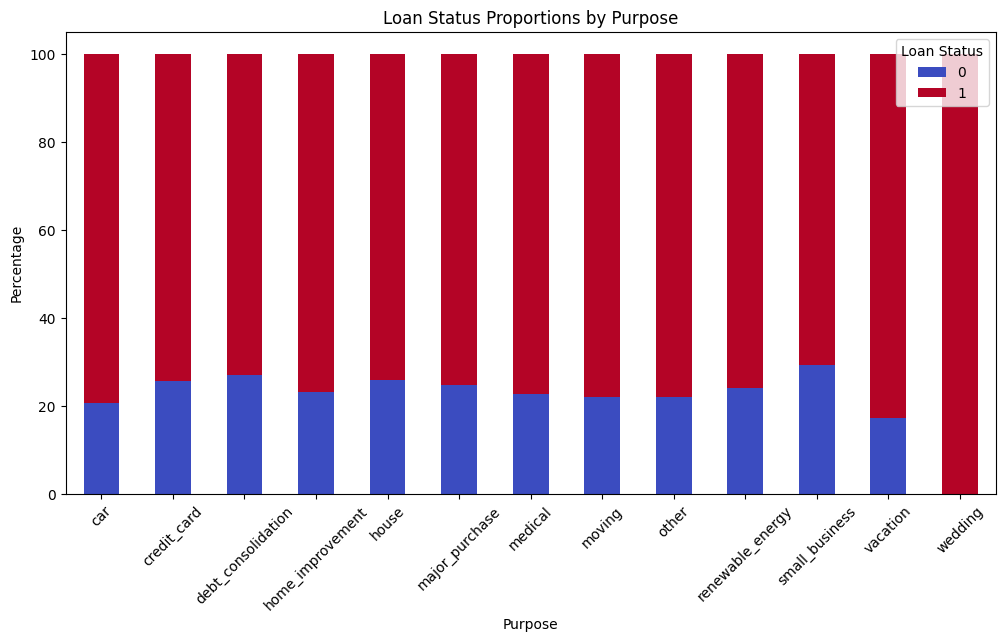

In [9]:
# Loan Status Proportion by Purpose
plt.figure(figsize=(12, 6))
loan_purpose_status = train_data.groupby(['purpose', 'loan_status']).size().unstack()
loan_purpose_status = loan_purpose_status.div(loan_purpose_status.sum(axis=1), axis=0) * 100
loan_purpose_status.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title('Loan Status Proportions by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

The plot displays the distribution of CIBIL scores for different loan statuses, showing how the scores differ between approved and declined loans.

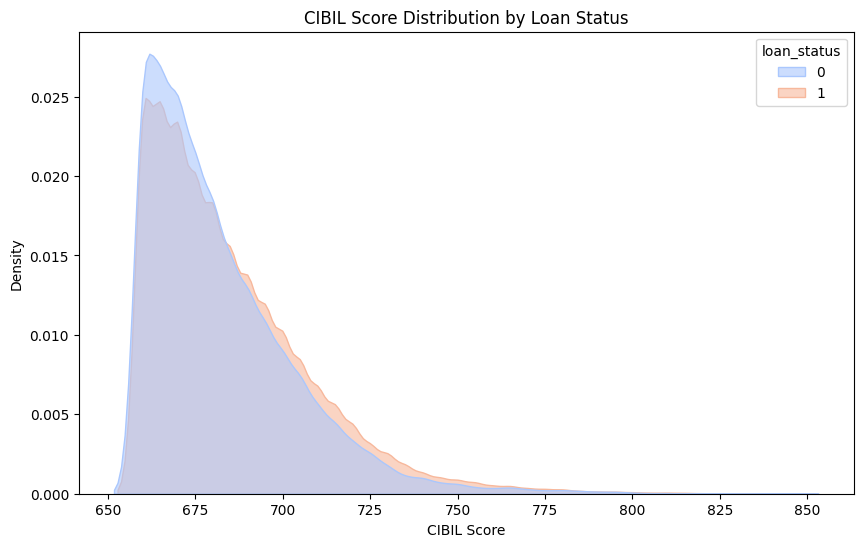

In [10]:
# CIBIL Score Distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_data, x='cibil_score', hue='loan_status', fill=True, common_norm=False, alpha=0.6, palette='coolwarm')
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('CIBIL Score')
plt.ylabel('Density')
plt.show()


This plot illustrates the distribution of loan amounts across different loan terms and statuses. It helps to compare how loan amounts vary for each loan term, separated by loan approval status.

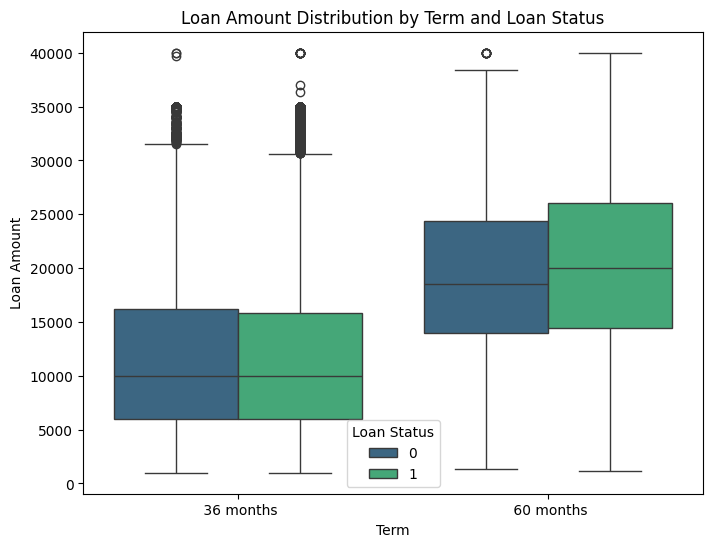

In [11]:
# Loan Amount vs Term
plt.figure(figsize=(8, 6))
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=train_data, palette='viridis')
plt.title('Loan Amount Distribution by Term and Loan Status')
plt.xlabel('Term')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()


This plot shows the count of loan statuses across different home ownership categories, helping to analyze how loan outcomes vary based on whether borrowers own, rent, or have other housing arrangements

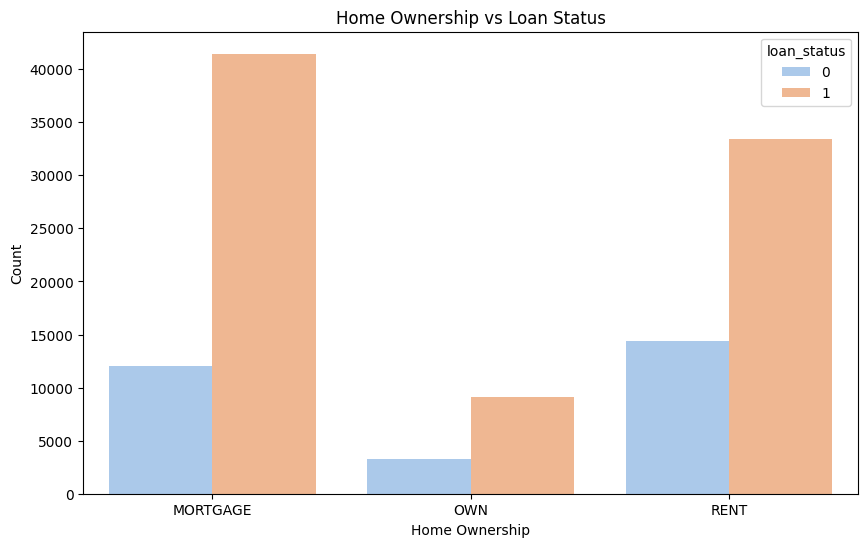

In [12]:
# Home Ownership vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=train_data, palette='pastel')
plt.title("Home Ownership vs Loan Status")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.show()

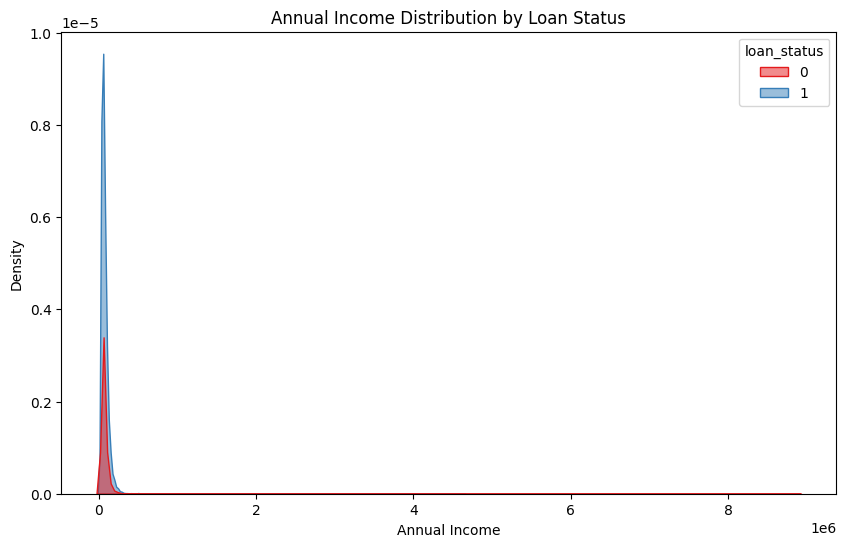

In [13]:
# Annual Income Distribution for Defaults and Non-Defaults
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_data, x='annual_inc', hue='loan_status', fill=True, palette='Set1', alpha=0.5)
plt.title("Annual Income Distribution by Loan Status")
plt.xlabel("Annual Income")
plt.ylabel("Density")
plt.show()


This plot shows the proportion of loan statuses (approved, declined) within each home ownership category. It helps to compare the percentage of loan outcomes based on whether borrowers own or rent their homes.

<Figure size 1200x600 with 0 Axes>

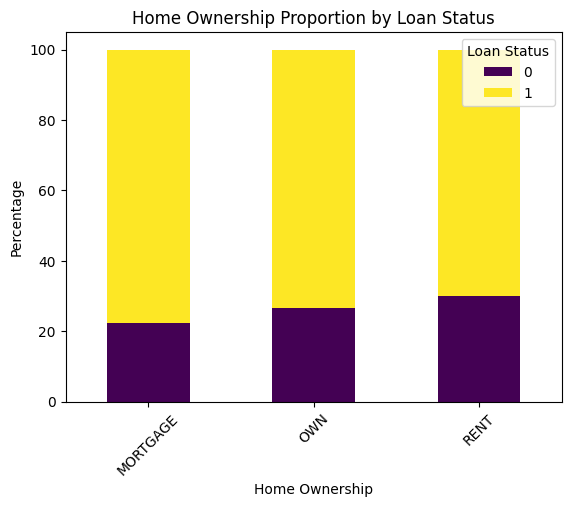

In [16]:
# Home Ownership Proportion by Loan Status
home_ownership_status = train_data.groupby(['home_ownership', 'loan_status']).size().unstack()
home_ownership_status = home_ownership_status.div(home_ownership_status.sum(axis=1), axis=0) * 100
plt.figure(figsize=(12, 6))
home_ownership_status.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Home Ownership Proportion by Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()


This heatmap visualizes the correlation between numerical features in the dataset. It helps identify relationships between variables, such as how strongly they are related to each other, with color intensity indicating the strength of the correlation.

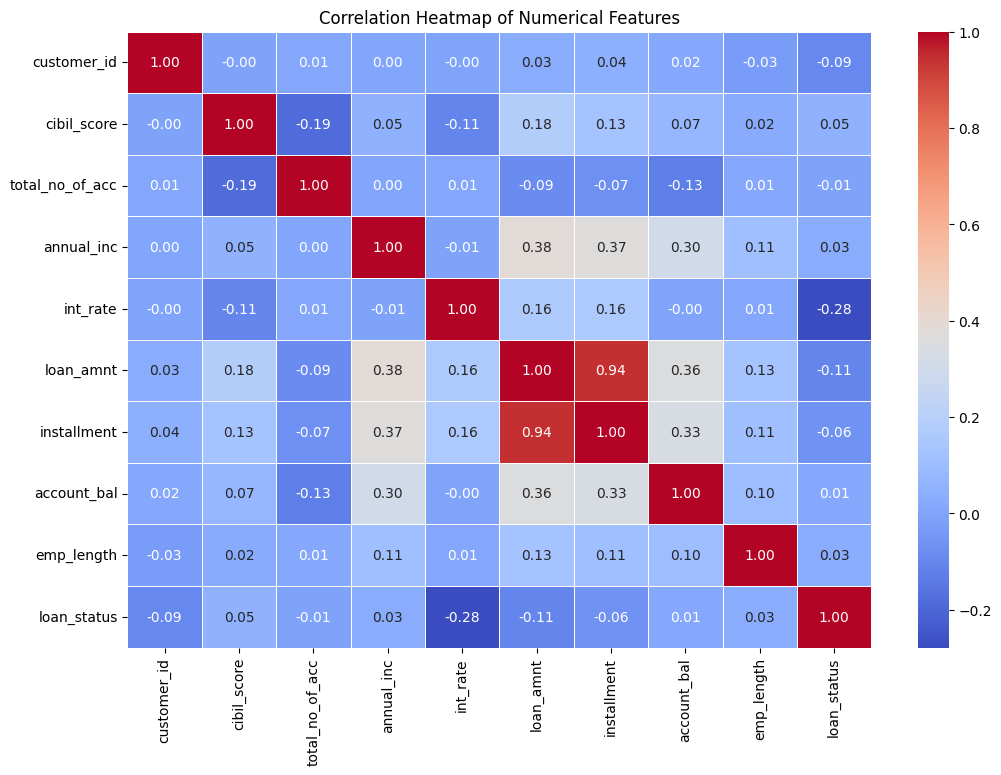

In [18]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
numerical_cols = train_data.select_dtypes(include=[np.number]).columns
correlation_matrix = train_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
